# Real Estate Analysis

## Overview

This project is an analysis of real estate within California. The goal of the project is to be able to predict sale price based on the features of the house. 

## Business Problem

The business problem for this project is to accurately price houses for sale according to the features of the house. 

## Data Understanding

The California Real Estate dataset from Kaggle has around 35,000 records of houses within the state. There are a total of 38 columns and include data such as location, size, and amenities. 

In [33]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('data/RealEstate_California.csv', index_col=0) #loading the data
df.head() #Viewing the first five rows of data

,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,time,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,1.610496e+12,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,1.626048e+12,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,1.625702e+12,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,1.625616e+12,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,1.625616e+12,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


In [3]:
df.drop(['id', 'stateId', 'country', 'cityId', 'countyId', 'time'], axis=1, inplace=True) 
#Dropping variables without predictor value or redundant

In [4]:
df.info() #looking at the overall columns/features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35389 entries, 0 to 35388
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datePostedString    35386 non-null  object 
 1   is_bankOwned        35389 non-null  int64  
 2   is_forAuction       35389 non-null  int64  
 3   event               35389 non-null  object 
 4   price               35389 non-null  float64
 5   pricePerSquareFoot  35389 non-null  float64
 6   city                35389 non-null  object 
 7   state               35389 non-null  object 
 8   yearBuilt           35389 non-null  int64  
 9   streetAddress       35389 non-null  object 
 10  zipcode             35364 non-null  float64
 11  longitude           35389 non-null  float64
 12  latitude            35389 non-null  float64
 13  hasBadGeocode       35389 non-null  int64  
 14  description         35110 non-null  object 
 15  currency            35389 non-null  object 
 16  livi

In [5]:
df.isna().sum() #checking for null values

datePostedString        3
is_bankOwned            0
is_forAuction           0
event                   0
price                   0
pricePerSquareFoot      0
city                    0
state                   0
yearBuilt               0
streetAddress           0
zipcode                25
longitude               0
latitude                0
hasBadGeocode           0
description           279
currency                0
livingArea              0
livingAreaValue         0
lotAreaUnits            0
bathrooms               0
bedrooms                0
buildingArea            0
parking                 0
garageSpaces            0
hasGarage               0
levels                  0
pool                    0
spa                     0
isNewConstruction       0
hasPetsAllowed          0
homeType                0
county                  0
dtype: int64

In [6]:
df.dropna(inplace=True) #dropping null values since there aren't too many when looking at the overall dataset

In [7]:
df.isna().sum() #verifying there's no more nulls

datePostedString      0
is_bankOwned          0
is_forAuction         0
event                 0
price                 0
pricePerSquareFoot    0
city                  0
state                 0
yearBuilt             0
streetAddress         0
zipcode               0
longitude             0
latitude              0
hasBadGeocode         0
description           0
currency              0
livingArea            0
livingAreaValue       0
lotAreaUnits          0
bathrooms             0
bedrooms              0
buildingArea          0
parking               0
garageSpaces          0
hasGarage             0
levels                0
pool                  0
spa                   0
isNewConstruction     0
hasPetsAllowed        0
homeType              0
county                0
dtype: int64

In [8]:
print(f'There are {df.duplicated().sum()} duplicated values') #Checking for any duplicated values

There are 3983 duplicated values


In [9]:
df.drop_duplicates(keep='first', inplace=True)
print(f'There are {df.duplicated().sum()} duplicated values') #Verifying duplicated values have been dropped

There are 0 duplicated values


In [10]:
df['year'] = pd.to_datetime(df['datePostedString']) #Converting date posted to year to observe yearly trends
df['year'] = df['year'].dt.year
df.drop(['datePostedString'], inplace=True, axis=1) #Dropping original date posted column

#### Target: Popularity Analysis

In [32]:
df['price'].describe()

count    3.109900e+04
mean     1.205870e+06
std      2.660288e+06
min      0.000000e+00
25%      3.950000e+05
50%      6.900000e+05
75%      1.200000e+06
max      9.500000e+07
Name: price, dtype: float64

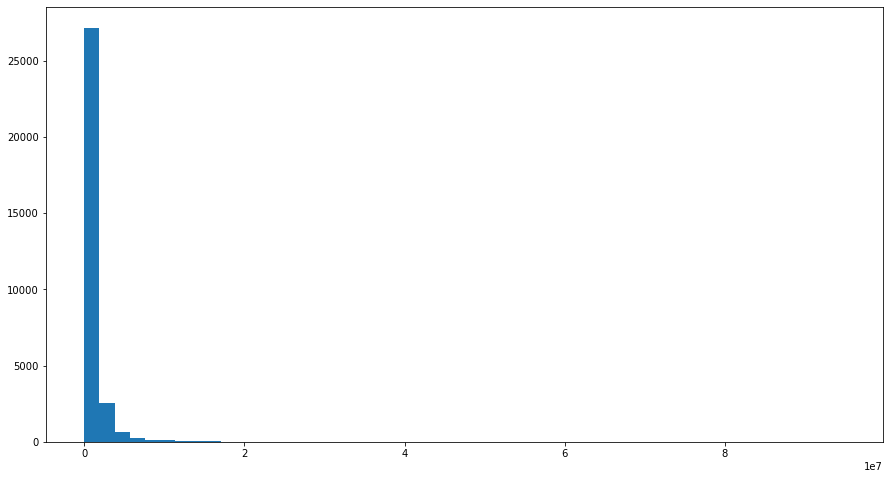

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(df['price'], bins=50);

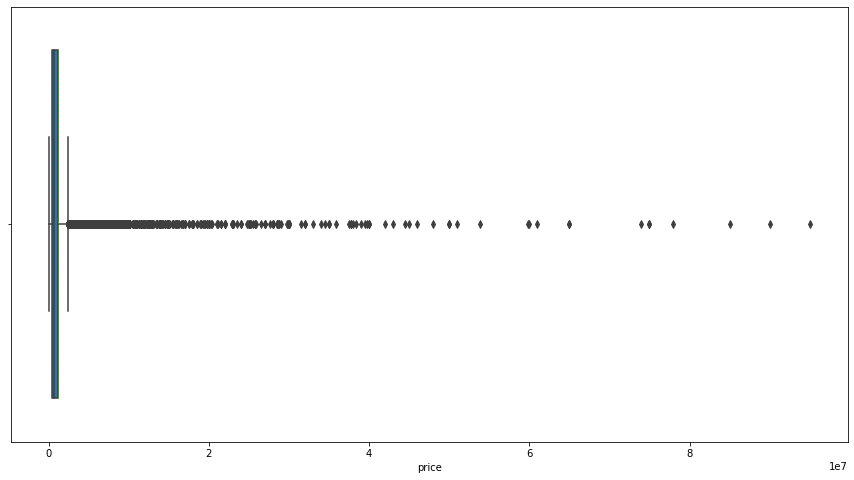

In [41]:
#Boxplot with outliers
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x=df['price'], showmeans=True, meanline=True);

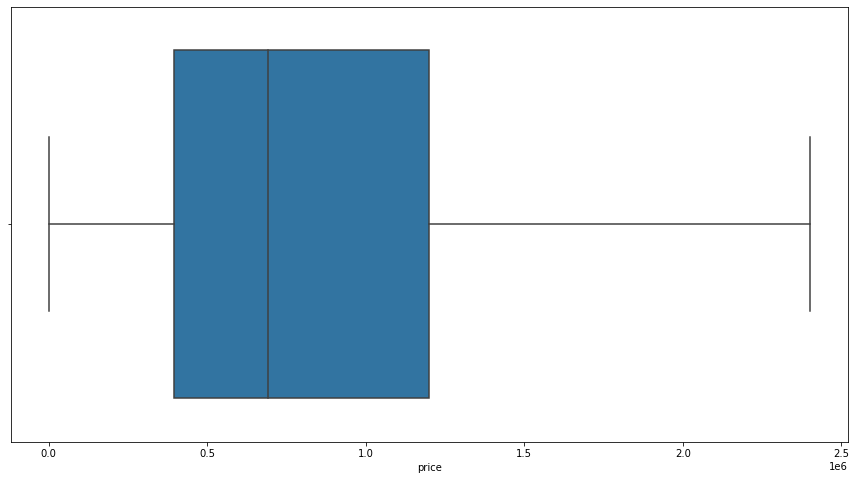

In [43]:
#Boxplot without outliers
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x=df['price'], showfliers=False);

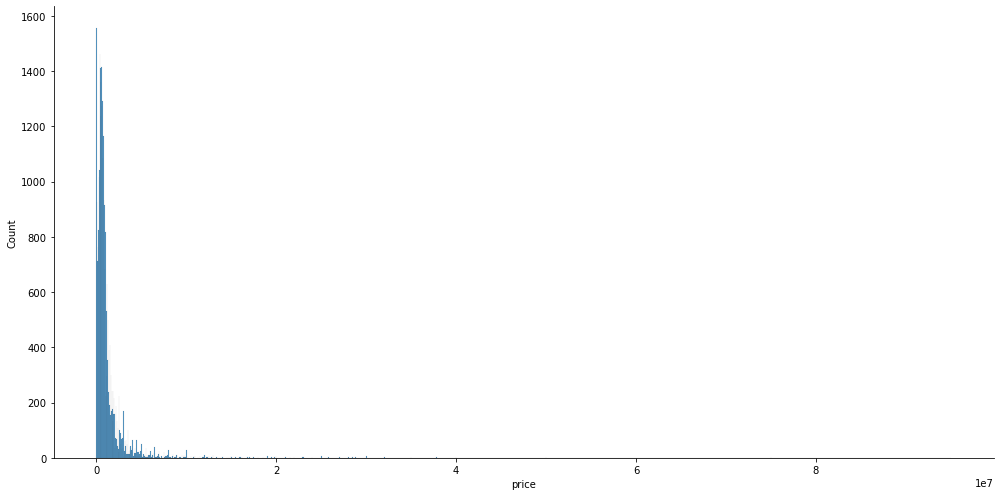

In [54]:
sns.displot(df['price'], height=7, aspect=2);

In [56]:
pop_corr = abs(df.corr()[['price']]).sort_values('price', ascending=False)
pop_corr

,price
price,1.000000
bathrooms,0.358305
bedrooms,0.182264
pool,0.158069
spa,0.114674
garageSpaces,0.113324
zipcode,0.079810
latitude,0.050764
yearBuilt,0.048952
hasGarage,0.046116


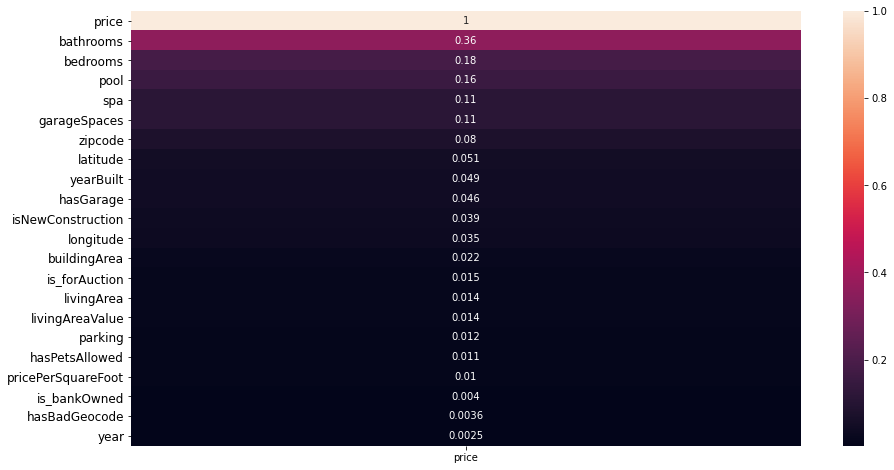

In [58]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(pop_corr, ax=ax, annot=True)
ax.set_yticklabels(labels=pop_corr.index, fontsize=12);